<a href="https://colab.research.google.com/github/Akn-ag/Play-store-app-review-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#defining working path
working_path='/content/drive/My Drive/capstone data/'

In [ ]:
#loading csv files required for EDA
df1=pd.read_csv(working_path+'Play Store Data.csv')
df2=pd.read_csv(working_path+'User Reviews.csv')

In [ ]:
#looking for top 5 rows
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#looking for last 5 rows

df1.tail()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#Checking Number of columns and rows
df1.shape

(10841, 13)

In [ ]:
#looking for info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# define a function to get more info from dataset

def infodata(df):
  infodf=pd.DataFrame()
  infodf['App']=df.columns
  infodf['count_of_NaN_values']=df.isnull().sum().values
  infodf['unique_number_of_daata']=df.nunique().values
  infodf['datatype']=df.dtypes.values
  return infodf

In [ ]:
#checking more info using defined function
infodata(df1)

,App,count_of_NaN_values,unique_number_of_daata,datatype
0,App,0,9660,object
1,Category,0,34,object
2,Rating,1474,40,float64
3,Reviews,0,6002,object
4,Size,0,462,object
5,Installs,0,22,object
6,Type,1,3,object
7,Price,0,93,object
8,Content Rating,1,6,object
9,Genres,0,120,object


From above it is clear that our dataset 'Rating' column contains lots of null values and 'Content Rating','Current Ver','Android Ver' columns contains very small amount of null values comparing to data we will try to impute or delete those values using best possible way

In [ ]:
df1[df1['Content Rating'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df1.drop(df1.index[10472],axis=0,inplace=True)

In [ ]:
#filling na values using fillna method

df1.Rating.fillna(df1.Rating.median(),inplace=True)

In [ ]:
# Converting KB to MB 
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: float(x))


In [ ]:
df1['Installs'] = df1['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df1['Installs'] = df1['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)

In [ ]:
df1['Reviews']=pd.to_numeric(df1['Reviews'])
df1['Installs']=pd.to_numeric(df1['Installs'])
df1['Size']=pd.to_numeric(df1['Size'])

In [ ]:
df1.describe()

,Rating,Reviews,Size,Installs
count,10840.000000,1.084000e+04,9145.000000,1.084000e+04
mean,4.206476,4.441529e+05,21.516165,1.546434e+07
std,0.480342,2.927761e+06,22.589084,8.502936e+07
min,1.000000,0.000000e+00,0.008301,0.000000e+00
25%,4.100000,3.800000e+01,4.900000,1.000000e+03
50%,4.300000,2.094000e+03,13.000000,1.000000e+05
75%,4.500000,5.477550e+04,30.000000,5.000000e+06
max,5.000000,7.815831e+07,100.000000,1.000000e+09


In [ ]:
df1.Size.fillna(df1.Size.median(),inplace=True)

In [ ]:
df1.drop(['Current Ver','Android Ver'],axis=1,inplace=True)
df1.dropna(inplace=True)


In [ ]:
infodata(df1)

,App,count_of_NaN_values,unique_number_of_daata,datatype
0,App,0,9658,object
1,Category,0,33,object
2,Rating,0,39,float64
3,Reviews,0,6001,int64
4,Size,0,459,float64
5,Installs,0,20,int64
6,Type,0,2,object
7,Price,0,92,object
8,Content Rating,0,6,object
9,Genres,0,119,object


In [ ]:
df1.describe()

,Rating,Reviews,Size,Installs
count,10839.000000,1.083900e+04,10839.000000,1.083900e+04
mean,4.206467,4.441939e+05,20.185195,1.546577e+07
std,0.480363,2.927893e+06,20.977970,8.503315e+07
min,1.000000,0.000000e+00,0.008301,0.000000e+00
25%,4.100000,3.800000e+01,5.900000,3.000000e+03
50%,4.300000,2.094000e+03,13.000000,1.000000e+05
75%,4.500000,5.478300e+04,26.000000,5.000000e+06
max,5.000000,7.815831e+07,100.000000,1.000000e+09


Data Exploration

## Q1) Which are the top 20 Genres that are getting installed the most?

In [ ]:
top_20_genres_by_install=df1.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(20)

In [ ]:
top_20_genres_by_install.values

array([32647276251, 14176091369, 14069867902, 11442771915, 10727129155,
       10088247655,  9662830740,  9342039190,  7496317760,  6868787146,
        6207002720,  5064214684,  3247848785,  2867174498,  2325494782,
        2000247320,  1974187605,  1921469576,  1668476811,  1583072512])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


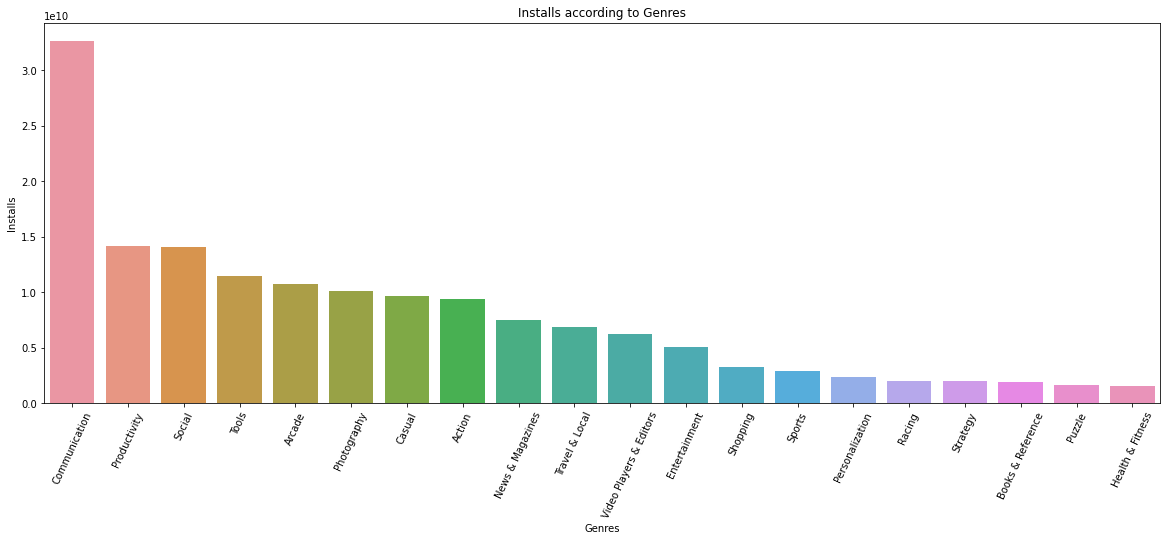

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_by_install.index,top_20_genres_by_install.values)

## Q2) 

In [ ]:
top_20_apps_by_genres=df1.groupby('Genres')['App'].count().sort_values(ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


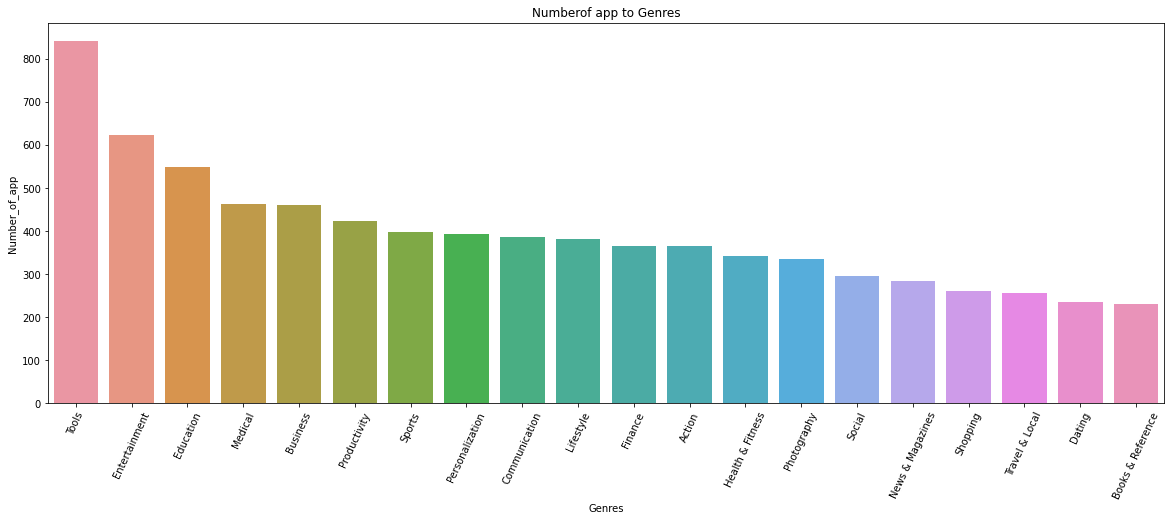

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number_of_app")
plt.title("Numberof app to Genres")
sns.barplot(top_20_apps_by_genres.index,top_20_apps_by_genres.values)

In [ ]:
top_20_apps_by_=df1.groupby('Genres')['App'].count().sort_values(ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


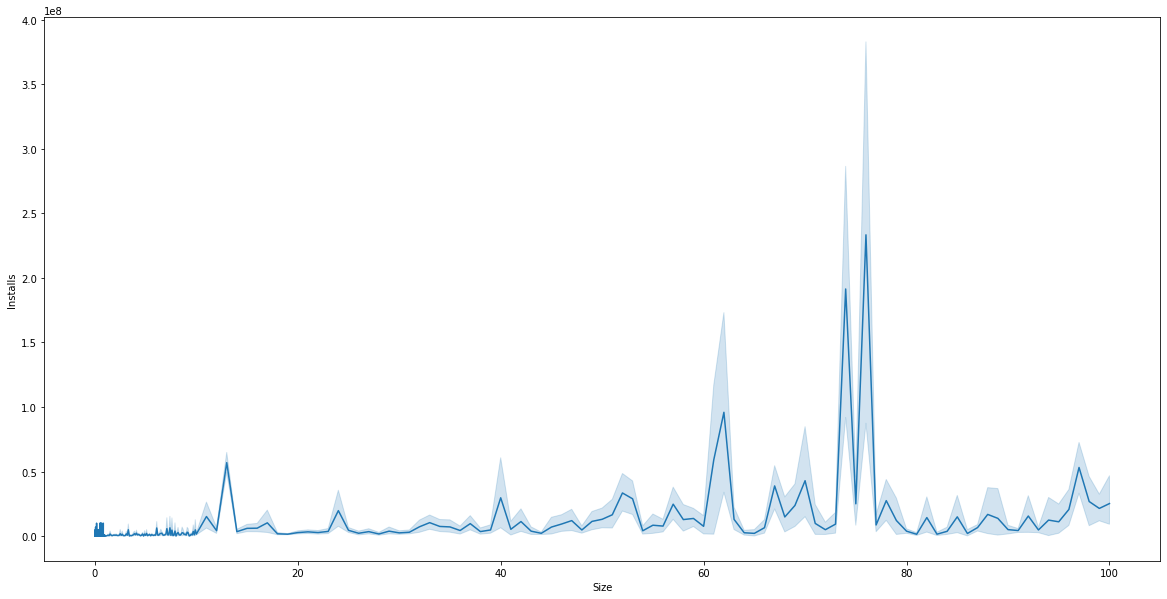

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(df1['Size'],df1['Installs'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


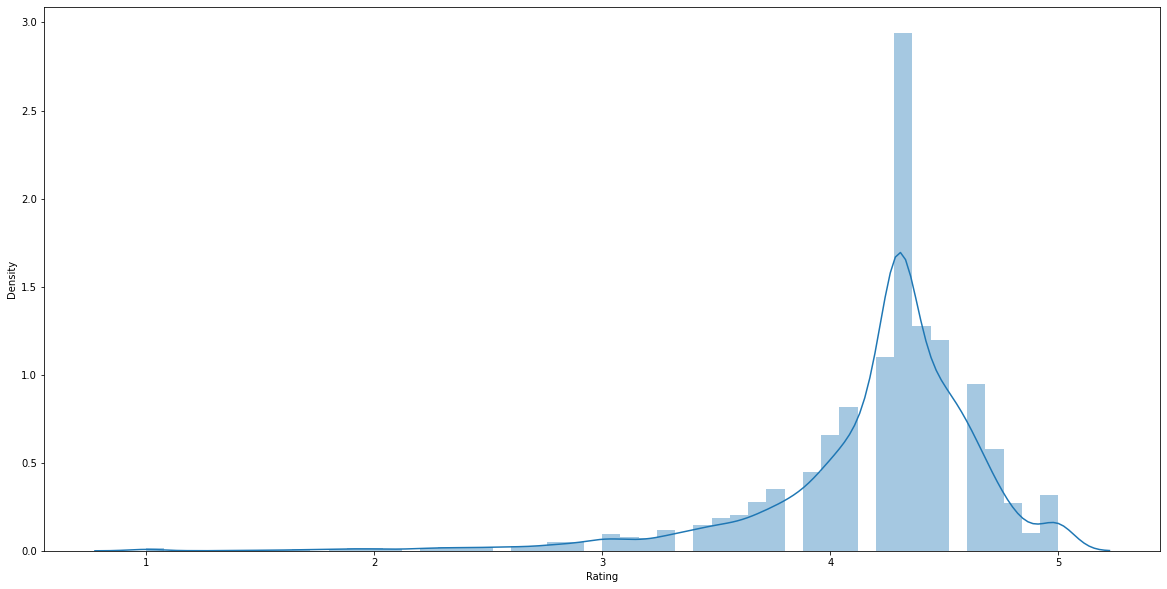

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df1.Rating)

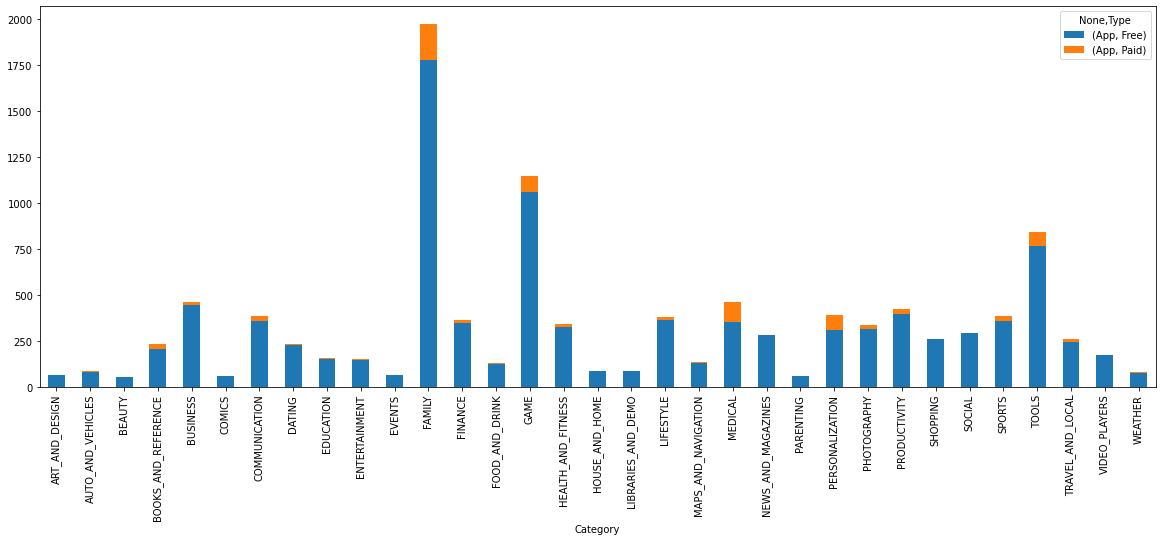

In [ ]:
app_count=df1.groupby(['Category','Type'])[['App']].count().sortunstack()
app_count.plot(kind='bar',stacked=True, figsize=(20,7))

In [ ]:
app_count.sort_values('Paid',ascending=False)

KeyError: ignored

In [ ]:
app_count.sort_values('Paid',ascending=False)


KeyError: ignored

In [ ]:
sns.barplot(app_count.index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

In [ ]:
sns.barplot(app_count.index, list((app_count.App.values[:,:1]).reshape((1,33))))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

In [ ]:
list((app_count.App.values[:,:1]).reshape((1,33)))

[array([  62.,   82.,   53.,  203.,  446.,   60.,  360.,  227.,  152.,
         147.,   63., 1780.,  349.,  125., 1061.,  325.,   88.,   84.,
         363.,  132.,  354.,  281.,   58.,  309.,  313.,  396.,  258.,
         292.,  360.,  765.,  246.,  171.,   74.])]